In [10]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont


In [11]:
data=pd.read_csv("C:/Users/hp/Downloads/tidy1.csv")

In [12]:
data.head()

gameId    season         teamHome             teamAway  eventType  \
0  2016020001  20162017  Ottawa Senators  Toronto Maple Leafs          0   
1  2016020001  20162017  Ottawa Senators  Toronto Maple Leafs          0   
2  2016020001  20162017  Ottawa Senators  Toronto Maple Leafs          0   
3  2016020001  20162017  Ottawa Senators  Toronto Maple Leafs          0   
4  2016020001  20162017  Ottawa Senators  Toronto Maple Leafs          0   

             eventTeam  period periodTime eventSide  coordinateX  coordinateY  \
0  Toronto Maple Leafs       1      01:11     right        -77.0          5.0   
1      Ottawa Senators       1      02:53      left         86.0         13.0   
2      Ottawa Senators       1      04:01      left         23.0        -38.0   
3      Ottawa Senators       1      04:46      left         33.0        -15.0   
4  Toronto Maple Leafs       1      06:46     right        -34.0         28.0   

       shooterName         goalieName    shotType emptyNet strength  
0  Mitchell Marner     Craig Anderson  Wrist Shot      NaN      NaN  
1      Chris Kelly  Frederik Andersen  Wrist Shot      NaN      NaN  
2        Cody Ceci  Frederik Andersen  Wrist Shot      NaN      NaN  
3    Erik Karlsson  Frederik Andersen   Slap Shot      NaN      NaN  
4  Martin Marincin     Craig Anderson  Wrist Shot      NaN      NaN

In [13]:
#Filter by Season
df=data[data["season"]==20162017]


In [15]:
df

gameId    season             teamHome             teamAway  \
0      2016020001  20162017      Ottawa Senators  Toronto Maple Leafs   
1      2016020001  20162017      Ottawa Senators  Toronto Maple Leafs   
2      2016020001  20162017      Ottawa Senators  Toronto Maple Leafs   
3      2016020001  20162017      Ottawa Senators  Toronto Maple Leafs   
4      2016020001  20162017      Ottawa Senators  Toronto Maple Leafs   
...           ...       ...                  ...                  ...   
80394  2016030416  20162017  Nashville Predators  Pittsburgh Penguins   
80395  2016030416  20162017  Nashville Predators  Pittsburgh Penguins   
80396  2016030416  20162017  Nashville Predators  Pittsburgh Penguins   
80397  2016030416  20162017  Nashville Predators  Pittsburgh Penguins   
80398  2016030416  20162017  Nashville Predators  Pittsburgh Penguins   

       eventType            eventTeam  period periodTime eventSide  \
0              0  Toronto Maple Leafs       1      01:11     right   
1              0      Ottawa Senators       1      02:53      left   
2              0      Ottawa Senators       1      04:01      left   
3              0      Ottawa Senators       1      04:46      left   
4              0  Toronto Maple Leafs       1      06:46     right   
...          ...                  ...     ...        ...       ...   
80394          0  Pittsburgh Penguins       3      10:17     right   
80395          0  Pittsburgh Penguins       3      11:34     right   
80396          0  Nashville Predators       3      15:44      left   
80397          1  Pittsburgh Penguins       3      18:25     right   
80398          1  Pittsburgh Penguins       3      19:46     right   

       coordinateX  coordinateY       shooterName         goalieName  \
0            -77.0          5.0   Mitchell Marner     Craig Anderson   
1             86.0         13.0       Chris Kelly  Frederik Andersen   
2             23.0        -38.0         Cody Ceci  Frederik Andersen   
3             33.0        -15.0     Erik Karlsson  Frederik Andersen   
4            -34.0         28.0   Martin Marincin     Craig Anderson   
...            ...          ...               ...                ...   
80394         60.0          2.0          Ian Cole        Pekka Rinne   
80395        -87.0        -12.0     Sidney Crosby        Pekka Rinne   
80396         86.0          5.0  Viktor Arvidsson        Matt Murray   
80397        -86.0          5.0  Patric Hornqvist        Pekka Rinne   
80398        -78.0          0.0      Carl Hagelin     Brian Dumoulin   

         shotType emptyNet strength  
0      Wrist Shot      NaN      NaN  
1      Wrist Shot      NaN      NaN  
2      Wrist Shot      NaN      NaN  
3       Slap Shot      NaN      NaN  
4      Wrist Shot      NaN      NaN  
...           ...      ...      ...  
80394  Wrist Shot      NaN      NaN  
80395    Backhand      NaN      NaN  
80396  Wrist Shot      NaN      NaN  
80397  Wrist Shot    False     EVEN  
80398  Wrist Shot     True     EVEN  

[80399 rows x 16 columns]

In [16]:
# Fix Coordinates
df.loc[df['coordinateX'] < 0, ['coordinateX', 'coordinateY']] *= -1


In [17]:
drop_list=[]
false_list=[True] * len(df["eventTeam"].unique().tolist())
ast=dict(label = 'All',
                  method = 'update',
                  args = [{'visible': false_list},
                          {'title': 'All',
                           'showlegend':True}])
drop_list.append(ast)
i=0
for team in df["eventTeam"].unique().tolist():
    false_list=[False] * len(df["eventTeam"].unique().tolist())
    false_list[i]=True
    i=i+1
    r=dict(label = team,
                      method = 'update',
                      args = [{'visible': false_list}, # the index of True aligns with the indices of plot traces
                              {'title': team,
                               'showlegend':True}])
    drop_list.append(r)


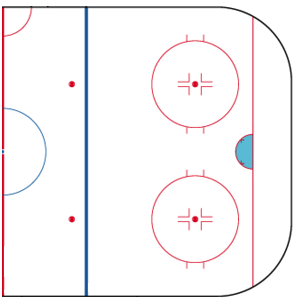
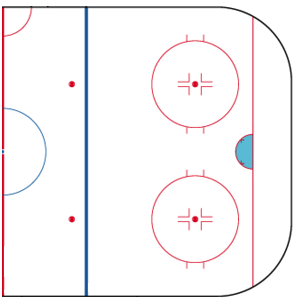
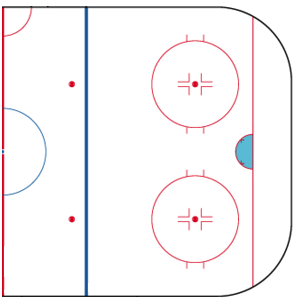
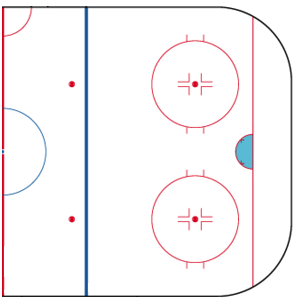
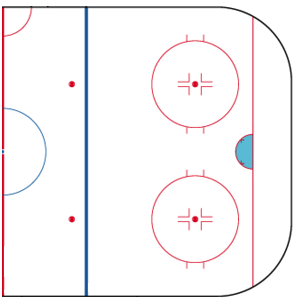
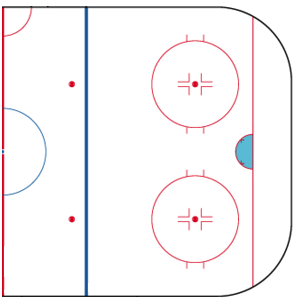
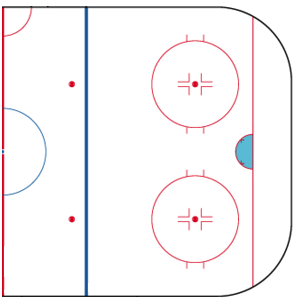
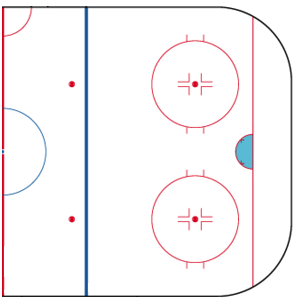
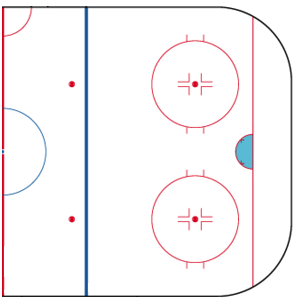
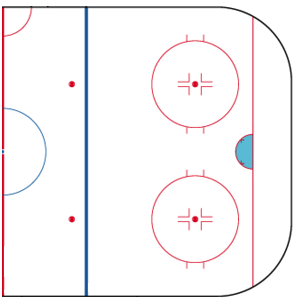
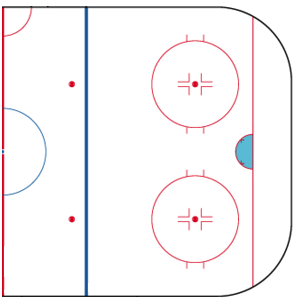
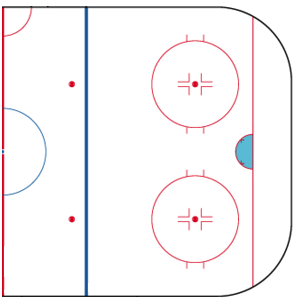
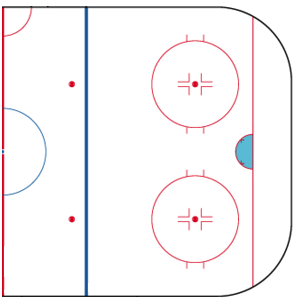
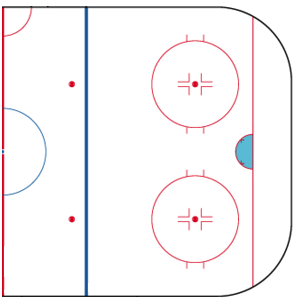
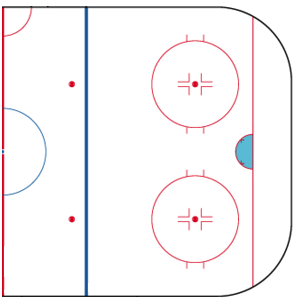
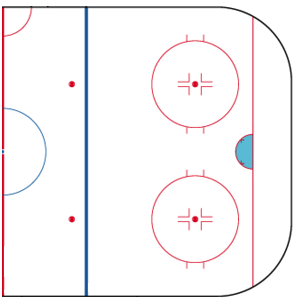
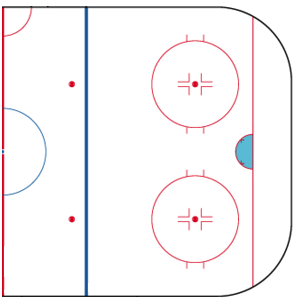
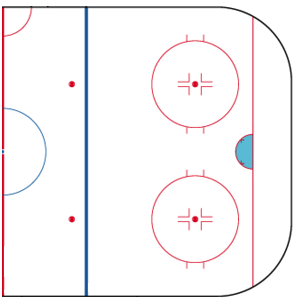
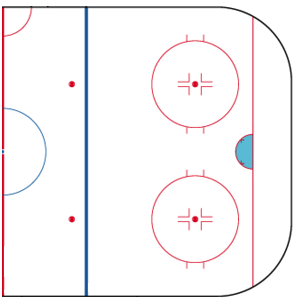
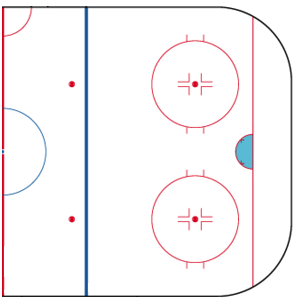
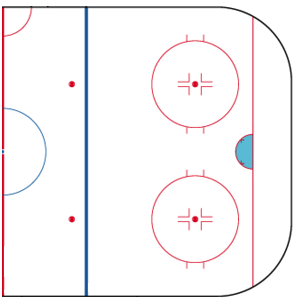
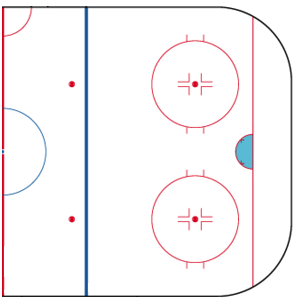
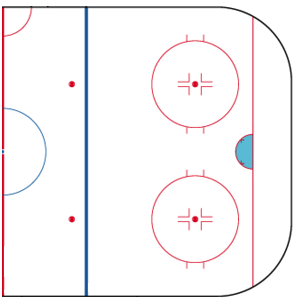
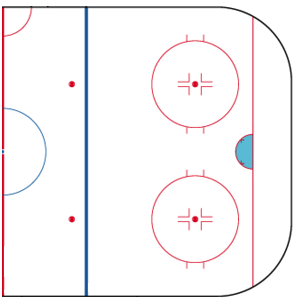
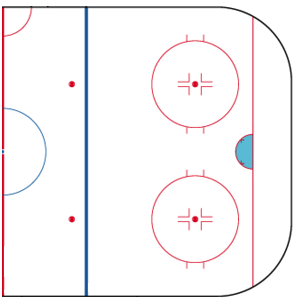
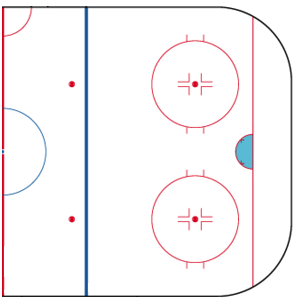
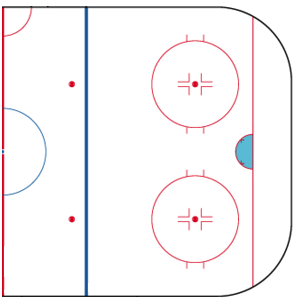
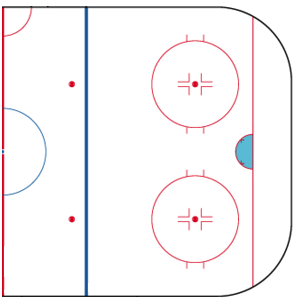
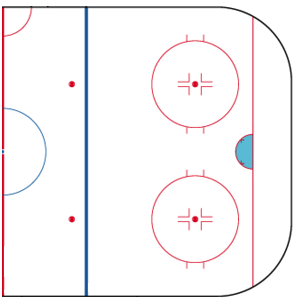
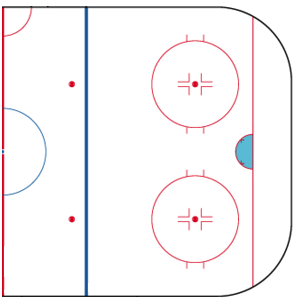

In [25]:
# How to change plot data using dropdowns
#
# This example shows how to manually add traces
# to the plot and configure the dropdown to only
# show the specific traces you allow.
import plotly.graph_objects as go
fig = go.Figure()

for team in df["eventTeam"].unique().tolist():
    fig.add_trace(go.Histogram2dContour(
            x=df[df["eventTeam"]==team]["coordinateX"], y=df[df["eventTeam"]==team]["coordinateY"],
            colorscale = 'reds')
                     )
    img = Image.open('C:/Users/hp/Desktop/Half_ice_hockey_rink-right.png')
    # Add images
    fig.add_layout_image(
            dict(
                source=img,
                xref="x",
                yref="y",
                x=1000,
                y=300,
                sizex=100,
                sizey=40,
                sizing="stretch",
                opacity=0.5,
                layer="below")
    )
    # Set templates
    fig.update_layout(template="plotly_white")


fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            drop_list)
        )
    ])


fig.show()


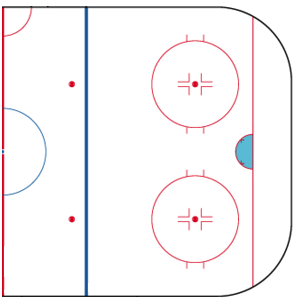

In [30]:
#A Working exmple
import plotly.graph_objects as go
# Create figure
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=[0, 0.5, 1, 2, 2.2], y=[1.23, 2.5, 0.42, 3, 1])
)

img = Image.open('C:/Users/hp/Desktop/Half_ice_hockey_rink-right.png')
# Add images
fig.add_layout_image(
        dict(
            source=img,
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()